In [1]:
import pandas as pd
import numpy as np
#from sklearn.cross_validation import KFold
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
from operator import itemgetter
from sklearn import preprocessing
from io import StringIO
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus 
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import KFold
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC
#from sklearn import svm
#from sklearn.decomposition import PCA
#import pylab as pl

import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing, svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
raw = pd.read_csv('CleanDatav2.csv', sep=',',index_col = 0)


In [ ]:
select = raw.loc[:,('Phase #', 'Distance','Height','Genus','Species','Location (m)', 'Behavior',
                    'Mass','Family' , 'Location Type')]
   

#'Body Length', 'Rain', 
                    #'Temp', ,'Luna' , 'Plot')]


In [71]:
for i in select.Family.unique():
    mask = (select['Family'] == i)
    mean = select.loc[mask, 'Height'].mean()
    select['Height'] = select['Height'].mask(mask,select['Height'].fillna(mean))

# for i in select['Phase #'].unique():
#     print(i)
#     mask = (select['Phase #'] == i)
#     mean = select.loc[mask, 'Hum'].mean()
#     print(mean)
#     select['Hum'] = select['Hum'].mask(mask,select['Hum'].fillna(mean))

In [72]:
select = select.dropna()
select['Phase #'].value_counts()

1    186
3    173
5    145
4    144
2    121
Name: Phase #, dtype: int64

In [73]:
y = select["Phase #"].values
X = select.drop(['Phase #'], axis=1)
for i in X.columns:
    if type(X[i][0]) == str:
        X[i] = X[i].astype("category").cat.codes
        
x = X.values

[[ 9.86098358e-01 -1.65450356e-01  1.04773169e-03 -6.08721975e-04
   1.48557821e-02 -1.25211229e-03  1.23604463e-04 -1.41334664e-04
  -3.52737538e-03]
 [-1.65814321e-01 -9.74624075e-01 -3.75534680e-03  5.42518582e-03
   1.49780613e-01 -3.10737901e-03  5.03133004e-03  1.27307787e-03
  -9.95814333e-03]]
[99813.52373685  2642.47706257]


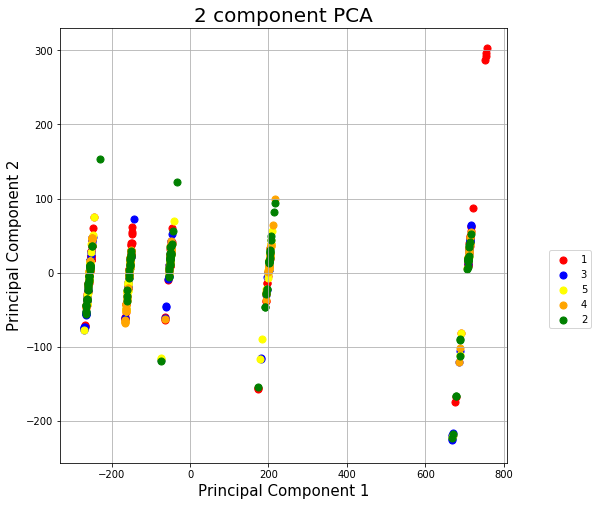

In [90]:
from sklearn.decomposition import PCA
import matplotlib.cm as cm

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, select[['Phase #']]], axis = 1)
print(pca.components_)
print(pca.explained_variance_)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 3, 5, 4, 2]
colors = ['red', 'blue', 'yellow', 'orange', 'green']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Phase #'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets, bbox_to_anchor=(1.2,0.5))
ax.grid()

In [94]:
principalComponents.shape

(769, 2)

Random Forest Model
Confusion Matrix
[[50  0  1  0  0]
 [10 25  0  1  0]
 [ 0  0 25 25  0]
 [ 0  0  0 46  0]
 [ 0  0  1 22 25]]
              precision    recall  f1-score   support

           1       0.83      0.98      0.90        51
           2       1.00      0.69      0.82        36
           3       0.93      0.50      0.65        50
           4       0.49      1.00      0.66        46
           5       1.00      0.52      0.68        48

    accuracy                           0.74       231
   macro avg       0.85      0.74      0.74       231
weighted avg       0.85      0.74      0.74       231

Accuracy score of training data:  0.8792532958299477
Accuracy score of testing data:  0.7402597402597403


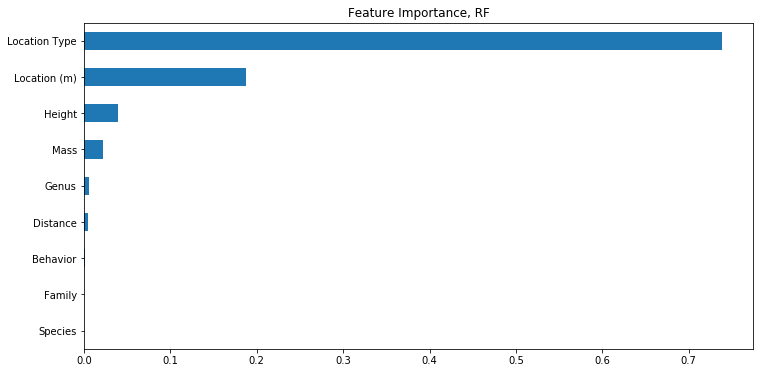

In [80]:
X_train, X_validate, Y_train, Y_validate = train_test_split(x, y, test_size=0.3, random_state=42)

# Random Forest Model, generating the feature importance plot
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validate = sc.transform(X_validate)

rf = RandomForestRegressor(n_estimators=10, random_state=42, max_depth = 5)
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_validate)

print("Random Forest Model")
print("Confusion Matrix")
print(confusion_matrix(Y_validate, y_pred.round()))
print(classification_report(Y_validate, y_pred.round()))
print("Accuracy score of training data: ", rf.score(X_train, Y_train))
print('Accuracy score of testing data: ', accuracy_score(Y_validate, y_pred.round()))

figure(num=None, figsize=(12, 6), facecolor='w', edgecolor='k')
plt.title("Feature Importance, RF")
feat_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)
feat_importances.plot(kind='barh')
plt.show()

In [25]:
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.2)

rf = RandomForestClassifier(n_estimators = 1000, , )
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)

result_rf = confusion_matrix(y_test, pred_rf)
Accuracy = accuracy_score(y_test, pred_rf)
Error_Rate = 1 - accuracy_score(y_test, pred_rf)
print('Confusion Matrix for model')
print(result_rf)
print('The Accuracy for model', 'is', Accuracy)
print('The Error Rate for model', 'is', Error_Rate, "\n")

#estimator = rf.estimators_[0]
# export_graphviz(estimator, out_file='rf.dot', 
#                 feature_names= X.columns, 
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)


NameError: name 'train' is not defined

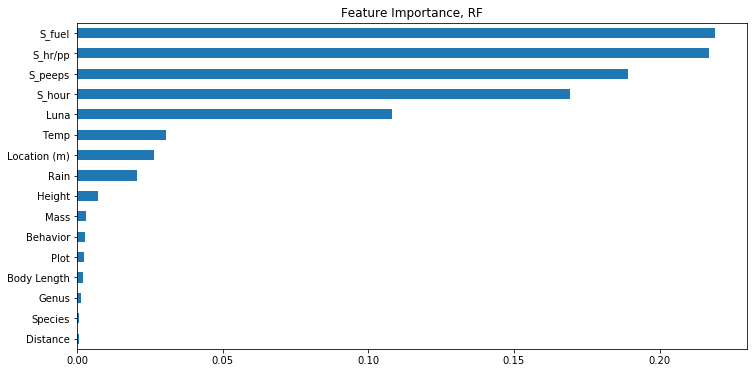

In [16]:
plt.figure(num=None, figsize=(12, 6), facecolor='w', edgecolor='k')
plt.title("Feature Importance, RF")
feat_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)
feat_importances.plot(kind='barh')
plt.show()